In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
%cd "/content/gdrive/MyDrive"

/content/gdrive/MyDrive


Error cuadrático medio (MSE) en entrenamiento: 1065.089536268533
Error cuadrático medio (MSE) en validación: 1054.1709814915894
Error cuadrático medio (MSE) en prueba: 621.9455402560793


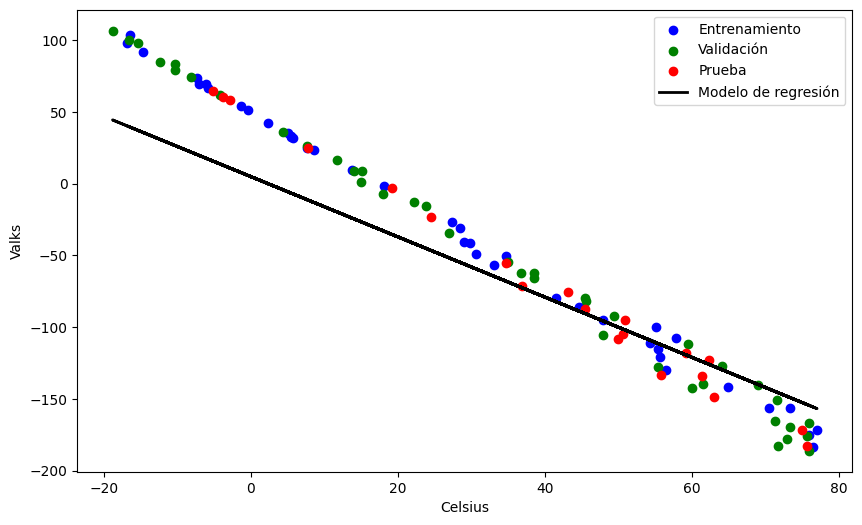

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

data = pd.read_csv('Valhalla23.csv')
semilla = 6390

# Separacion de datos: entrenamiento (40%), validación (40%), y prueba (20%)
train, temp = train_test_split(data, test_size=0.6, random_state=semilla)
valid, test = train_test_split(temp, test_size=0.33, random_state=semilla)

# Separar caracteristicas y etiquetas
X_train = train[['Celsius']]
y_train = train['Valks']
X_valid = valid[['Celsius']]
y_valid = valid['Valks']
X_test = test[['Celsius']]
y_test = test['Valks']

# Crear el modelo base SGDRegressor con los paaámetros especificados
model = SGDRegressor(learning_rate='constant', eta0=1e-4, max_iter=1000000, random_state=semilla)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir sobre los conjuntos de entrenamiento, validación y prueba
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)
y_test_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE) en los tres conjuntos
mse_train = mean_squared_error(y_train, y_train_pred)
mse_valid = mean_squared_error(y_valid, y_valid_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Mostrar los resultados
print(f"Error cuadrático medio (MSE) en entrenamiento: {mse_train}")
print(f"Error cuadrático medio (MSE) en validación: {mse_valid}")
print(f"Error cuadrático medio (MSE) en prueba: {mse_test}")

# Graficar los datos y el modelo de regresión
plt.figure(figsize=(10, 6))

plt.scatter(X_train, y_train, color='blue', label='Entrenamiento')
plt.scatter(X_valid, y_valid, color='green', label='Validación')
plt.scatter(X_test, y_test, color='red', label='Prueba')

# Graficar la recta de regresión sobre el rango de datos
X_range = pd.concat([X_train, X_valid, X_test])
plt.plot(X_range, model.predict(X_range), color='black', linewidth=2, label='Modelo de regresión')

plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.legend()
plt.show()

[2, 3, 4, 8, 10, 11, 16, 19, 22, 23, 25, 26, 27, 29, 32, 35, 36, 37, 38, 39]
Elemento 2: MSE Entrenamiento Promedio = 31.236728395642466, MSE Validacion Promedio = 4334.535764338458
Elemento 3: MSE Entrenamiento Promedio = 143.5083697314655, MSE Validacion Promedio = 321.48297351928994
Elemento 4: MSE Entrenamiento Promedio = 45.92872783715613, MSE Validacion Promedio = 164.6730557827653
Elemento 8: MSE Entrenamiento Promedio = 473.5949906419499, MSE Validacion Promedio = 657.9017672910721
Elemento 10: MSE Entrenamiento Promedio = 37.52280576417218, MSE Validacion Promedio = 78.73302061567215
Elemento 11: MSE Entrenamiento Promedio = 888.1862621833959, MSE Validacion Promedio = 906.6119155688373
Elemento 16: MSE Entrenamiento Promedio = 736.1997602637391, MSE Validacion Promedio = 751.6317653587398
Elemento 19: MSE Entrenamiento Promedio = 1106.037695038527, MSE Validacion Promedio = 1054.4490183560101
Elemento 22: MSE Entrenamiento Promedio = 1169.4181594182724, MSE Validacion Promedi

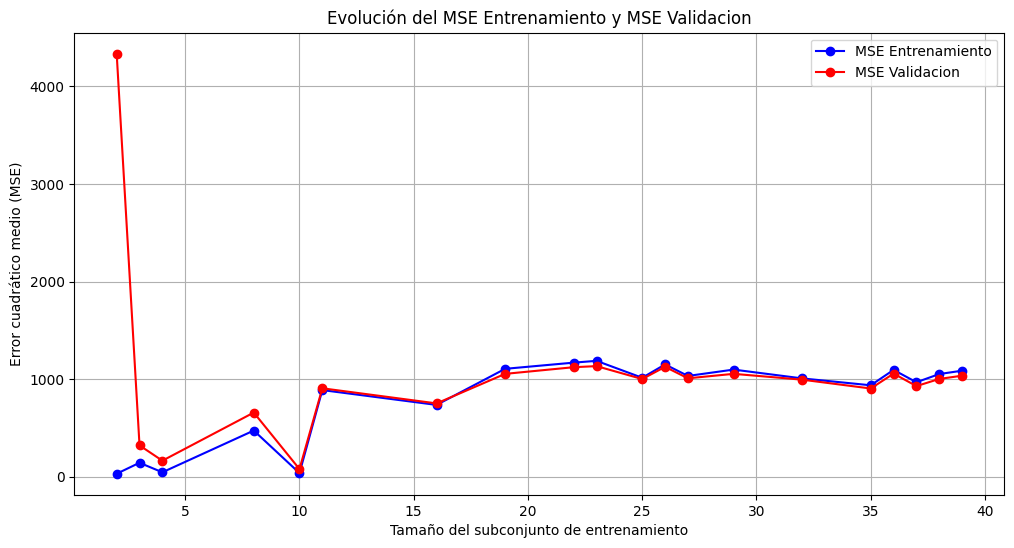

In [36]:
# Lista de 20 numeros enteros entre el 2 y 39 (incluyendo 2)
elementos = [2] + random.sample(range(3, 40), 19)
elementos.sort()
print(elementos)

# Inicializar listas para almacenar los errores medios de cada tamaño
avg_mse_train_list = []
avg_mse_valid_list = []

# Bucle para cada tamaño de la lista de elementos
for elemento in elementos:
    mse_train_list = []  # Lista para almacenar los MSE en entrenamiento
    mse_valid_list = []  # Lista para almacenar los MSE en validación

    for i in range(100):
        # Seleccionar un subconjunto aleatorio de tamaño `elemento`
        indices = random.sample(range(len(X_train)), elemento)
        X_sample = X_train.iloc[indices]
        y_sample = y_train.iloc[indices]

        # Crear y entrenar el modelo base SGDRegressor
        model = SGDRegressor(learning_rate='constant', eta0=1e-4, max_iter=1000000, random_state=6390)
        model.fit(X_sample, y_sample)

        # Calcular el MSE en el subconjunto de entrenamiento
        y_train_pred = model.predict(X_sample)
        mse_train = mean_squared_error(y_sample, y_train_pred)
        mse_train_list.append(mse_train)

        # Predecir y calcular el MSE en el subconjunto de validación
        y_valid_pred = model.predict(valid[['Celsius']])
        mse_valid = mean_squared_error(valid['Valks'], y_valid_pred)
        mse_valid_list.append(mse_valid)

    # Calcular los errores medios para este tamaño y almacenar en las listas
    avg_mse_train = np.mean(mse_train_list)
    avg_mse_valid = np.mean(mse_valid_list)

    avg_mse_train_list.append(avg_mse_train)
    avg_mse_valid_list.append(avg_mse_valid)

    print(f"Elemento {elemento}: MSE Entrenamiento Promedio = {avg_mse_train}, MSE Validacion Promedio = {avg_mse_valid}")

# Graficar los errores medios
plt.figure(figsize=(12, 6))

# Gráfico de errores en entrenamiento
plt.plot(elementos, avg_mse_train_list, marker='o', color='blue', label='MSE Entrenamiento')

# Gráfico de errores en validación
plt.plot(elementos, avg_mse_valid_list, marker='o', color='red', label='MSE Validacion')

# Etiquetas y leyenda
plt.xlabel('Tamaño del subconjunto de entrenamiento')
plt.ylabel('Error cuadrático medio (MSE)')
plt.title('Evolución del MSE Entrenamiento y MSE Validacion')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

Como se puede observar dentro del anterior caso se necesitan mas cantidad de muestras que solo 2, ya que estas tan pequeñas muestras hacen que el error cuadratico de validacion sea extremadamente alto en comparacion con el de entrenamiento, esto quiere decir que el modelo no tiene datos suficientes para capturar patrones. Entonces de los casos presentados el mejor es el numero 10 debido a su bajo MSE de Validacion.


In [42]:
indices = random.sample(range(len(X_train)), 10)
indices
X_train_subset = X_train.iloc[indices]
y_train_subset = y_train.iloc[indices]

# Crear y entrenar el modelo base SGDRegressor
model = SGDRegressor(learning_rate='constant', eta0=1e-4, max_iter=1000000, random_state=semilla)
model.fit(X_train_subset, y_train_subset)

# Calcular el MSE en el subconjunto de entrenamiento
y_train_subset_pred = model.predict(X_train_subset)
mse_train_subset = mean_squared_error(y_train_subset, y_train_subset_pred)

# Calcular el MSE en el conjunto de validación
y_valid_pred = model.predict(X_valid)
mse_valid = mean_squared_error(y_valid, y_valid_pred)

# Calcular el MSE en el conjunto de prueba
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)

# Imprimir resultados
print(f"MSE en el subconjunto de entrenamiento (10 muestras): {mse_train_subset}")
print(f"MSE en el conjunto de validación: {mse_valid}")
print(f"MSE en el conjunto de prueba: {mse_test}")

MSE en el subconjunto de entrenamiento (10 muestras): 32.88228895569166
MSE en el conjunto de validación: 71.07586302559147
MSE en el conjunto de prueba: 74.50550128199356
